In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris, fetch_mldata
%matplotlib notebook

# Dimensionality Reduction
**The main idea**: Training instances lie withing a a lower subspace of the high-dimensional space of the data.

**Two main approaches for DR** (Hypothesis)
1. Projection: the training dataset can be projected to a lower-dimensional hyperplane
2. Manifold Learning: the training dataset lie close to a much lower high-dimensional manifold.

## PCA
* Identify the hyperplane that lies closest to the data and project data onto it.
* Select the axis that maximizes the amount of variance, as it is more likely to lose less information than the other projections

In [2]:
from sklearn.decomposition import PCA
iris = load_iris()

<IPython.core.display.Javascript object>


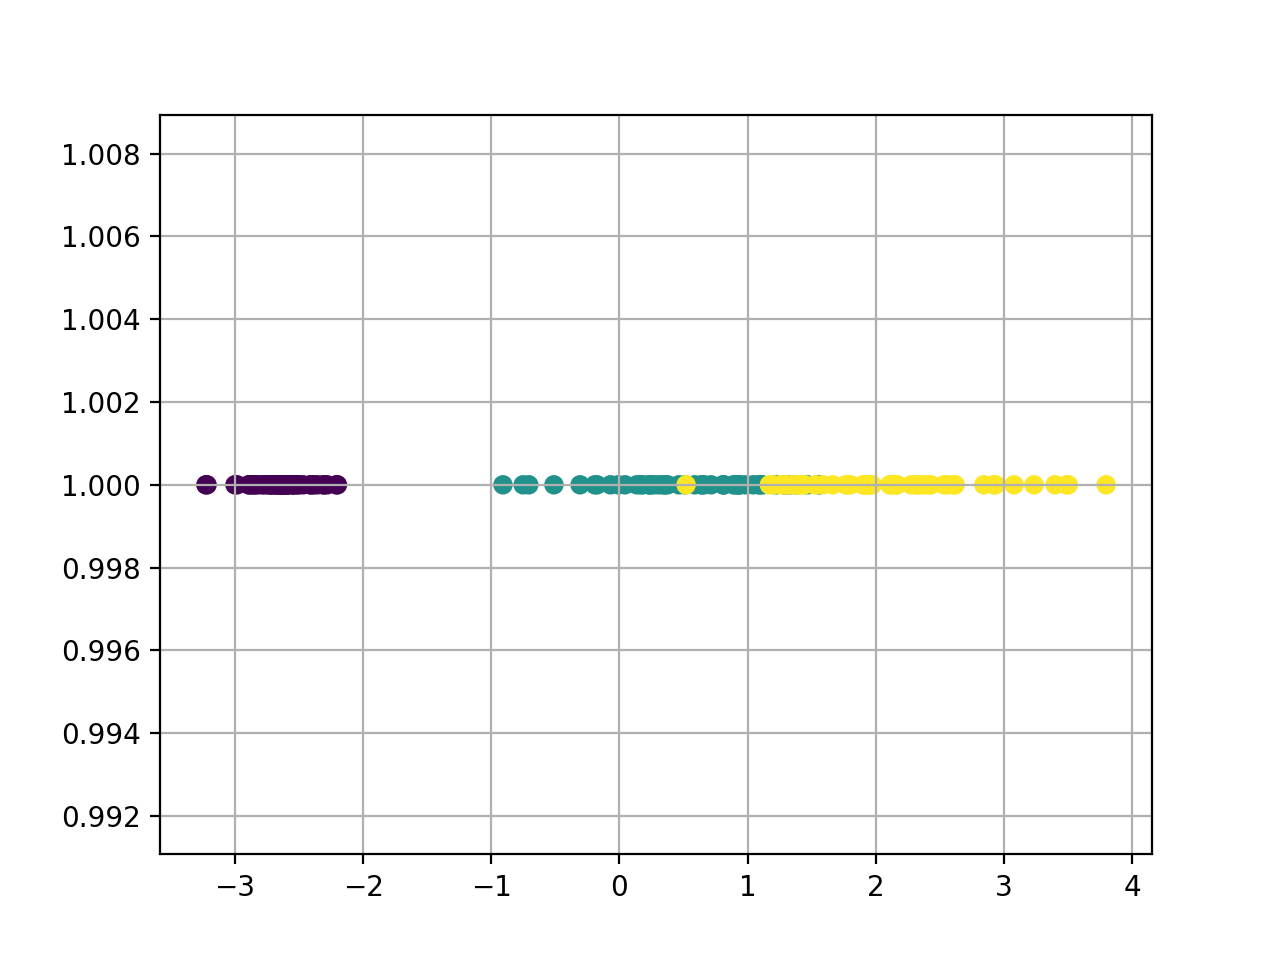

array([[ 0.36158968],
       [-0.08226889],
       [ 0.85657211],
       [ 0.35884393]])

In [41]:
pca = PCA(n_components=1)
projection = pca.fit_transform(iris["data"])
plt.scatter(*projection.T, np.linspace(1, 1, len(projection)), c=iris["target"])
plt.grid()
pca.components_.T

<IPython.core.display.Javascript object>


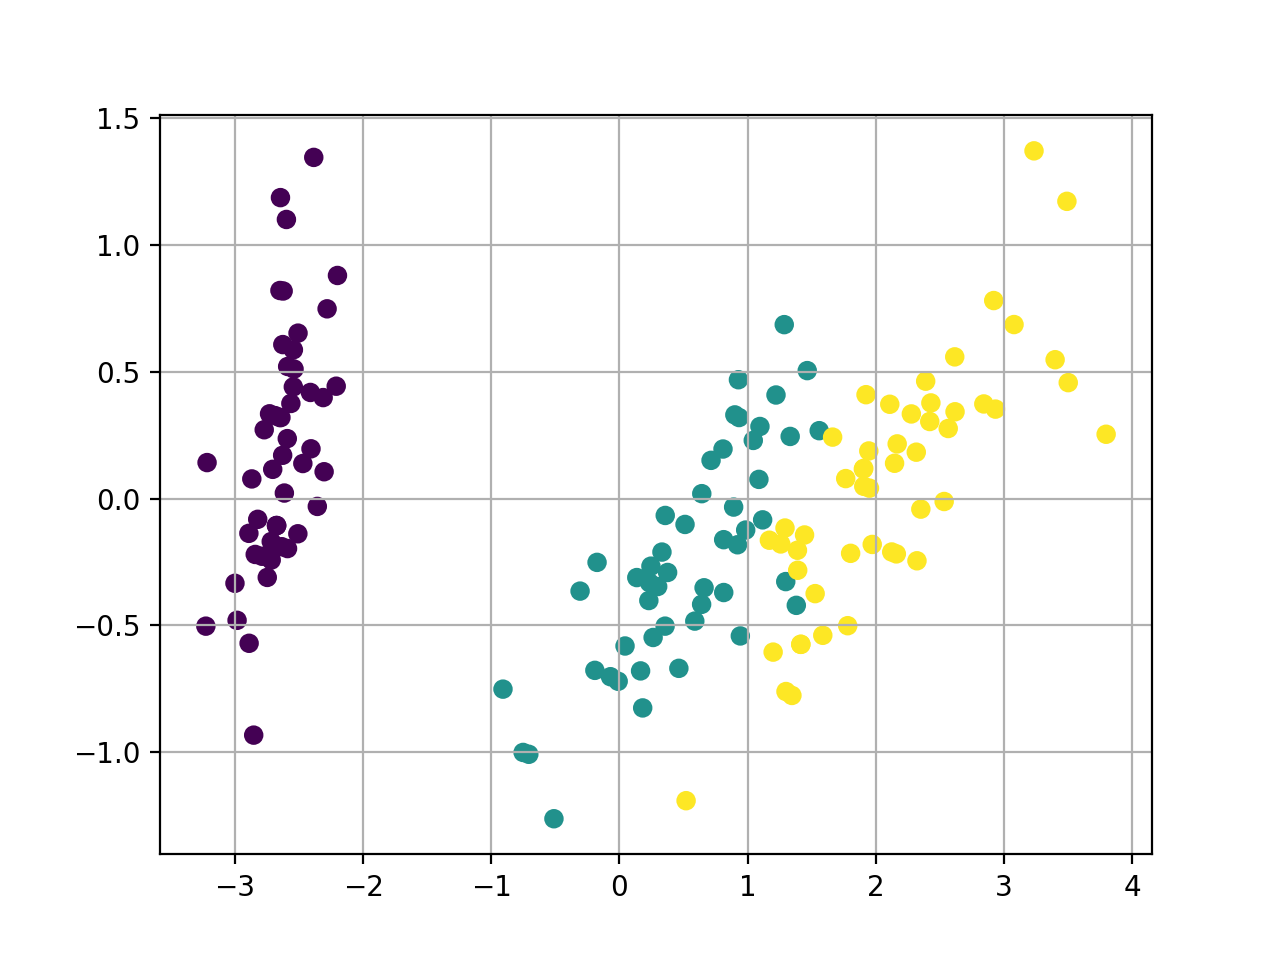

array([[ 0.36158968,  0.65653988],
       [-0.08226889,  0.72971237],
       [ 0.85657211, -0.1757674 ],
       [ 0.35884393, -0.07470647]])

In [54]:
pca = PCA(n_components=2)
projection = pca.fit_transform(iris["data"])
plt.scatter(*projection.T, c=iris["target"])
plt.grid()
pca.components_.T

In [21]:
X = iris["data"]
X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X)
V.T

array([[ 0.36158968, -0.65653988,  0.58099728,  0.31725455],
       [-0.08226889, -0.72971237, -0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 , -0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647, -0.54906091,  0.75112056]])

<IPython.core.display.Javascript object>


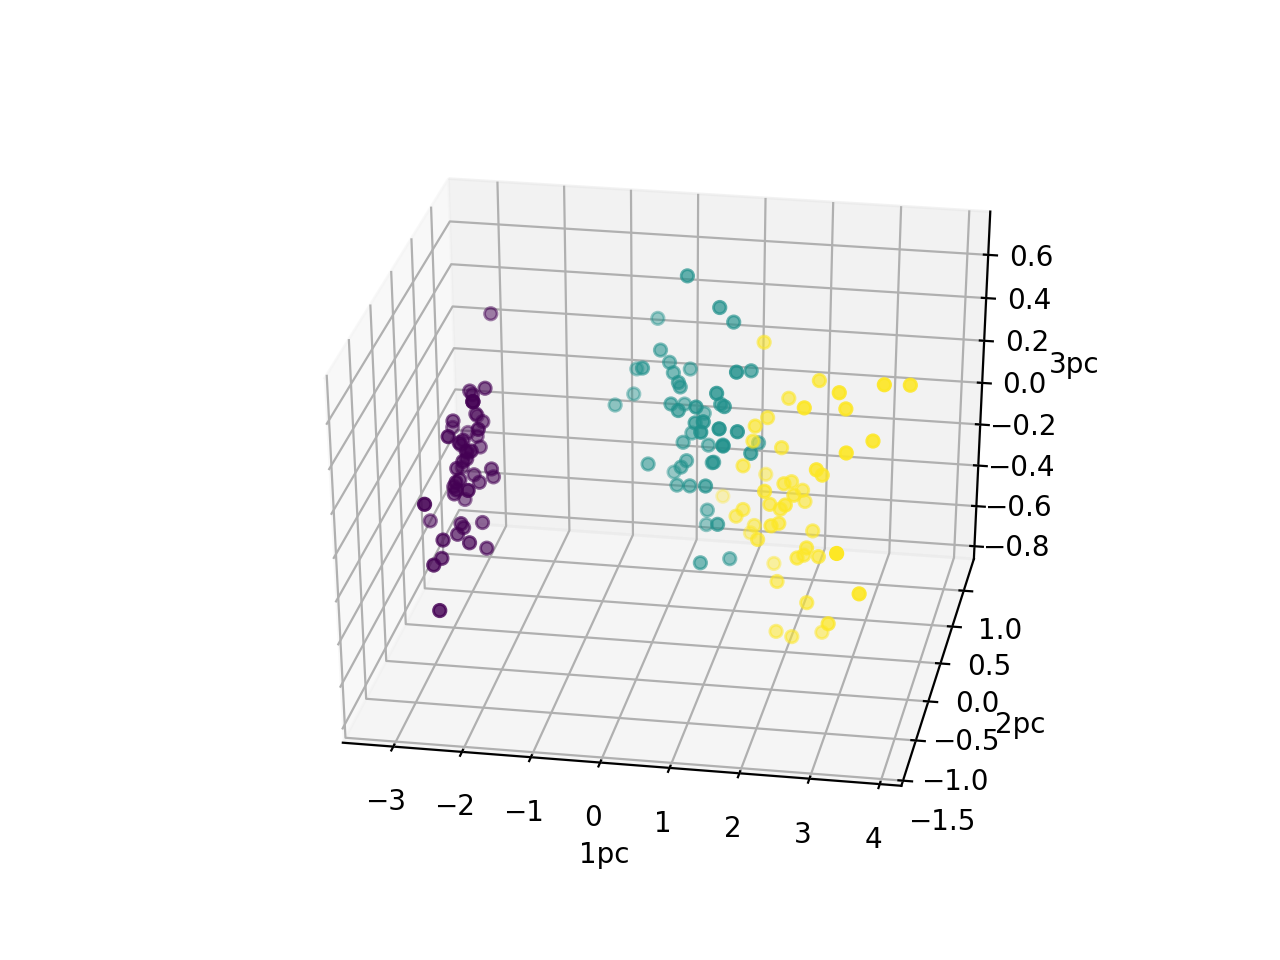

Text(0.5,0,'3pc')

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(*(X @ V.T[:, :3]).T, c=iris["target"])
ax.set_xlabel("1pc")
ax.set_ylabel("2pc")
ax.set_zlabel("3pc")

### Explained Variance
To know the number of principal components to use, a good idea is to plot the tota explained variance as a function of the considered dimensions. In general, we want to look 

<IPython.core.display.Javascript object>


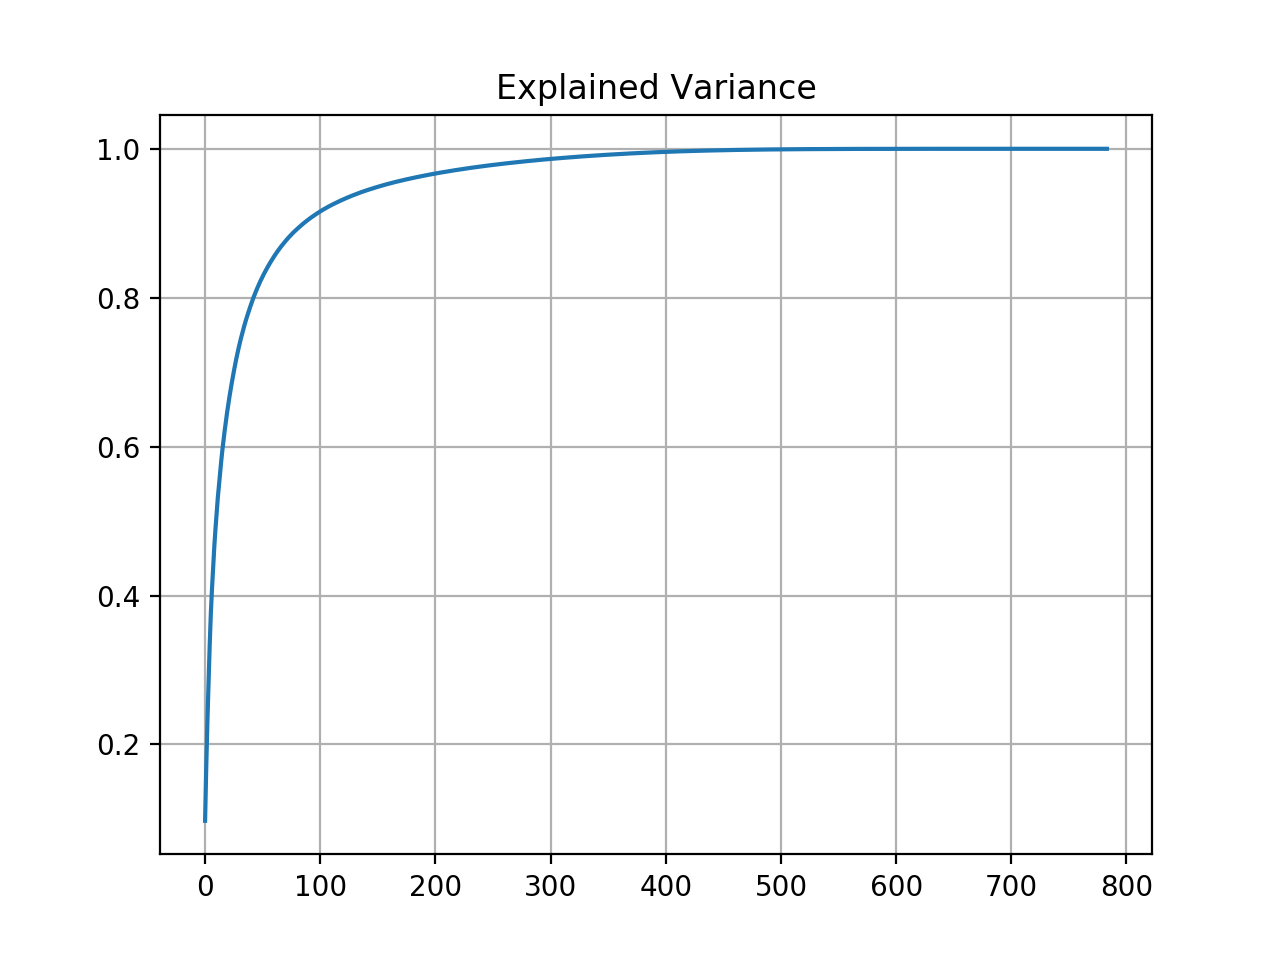

In [71]:
mnist = fetch_mldata("mnist original")
pca = PCA()
pca.fit(mnist["data"])
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.title("Explained Variance");

## Kernel PCA

<IPython.core.display.Javascript object>


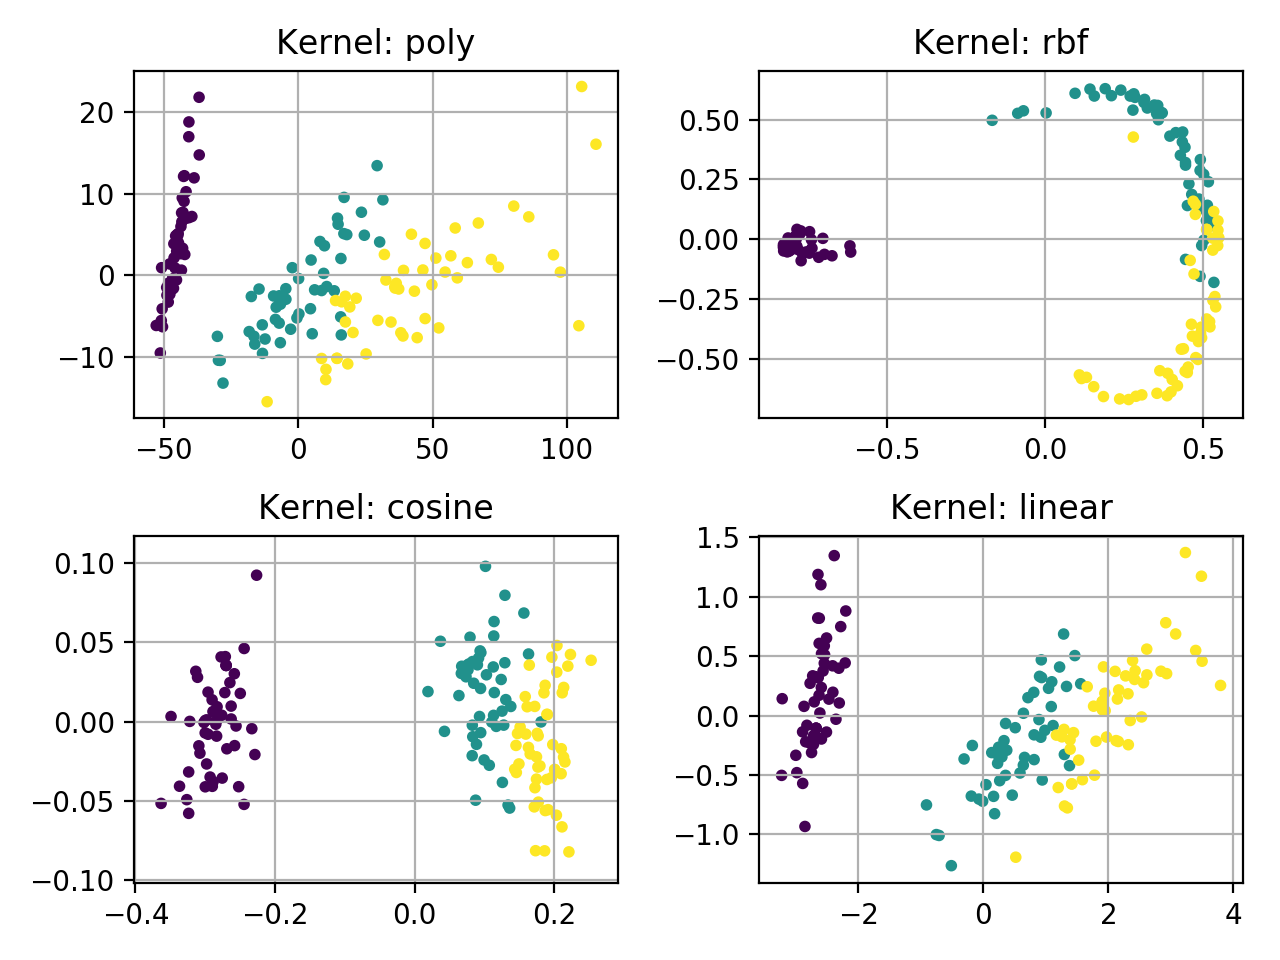

In [96]:
from sklearn.decomposition import KernelPCA
kernels = ["poly", "rbf", "cosine", "linear"]
fig = plt.figure()
for i, k in enumerate(kernels):
    ax = fig.add_subplot(2, 2, i + 1)
    kern_pca = KernelPCA(n_components=2, kernel=k)
    projection = kern_pca.fit_transform(iris["data"])
    ax.scatter(*projection.T, c=iris["target"], s=10)
    ax.set_title(f"Kernel: {k}")
    ax.grid()
plt.tight_layout()

## LLE: Locally Linear Embedding
A two step nonlinear manifold approach:
1. Measure how each training instance linearly relates to its closest neighbors
2. Look for a low-dimensiona representation of the training set where the local relationships are best preserved.

<IPython.core.display.Javascript object>


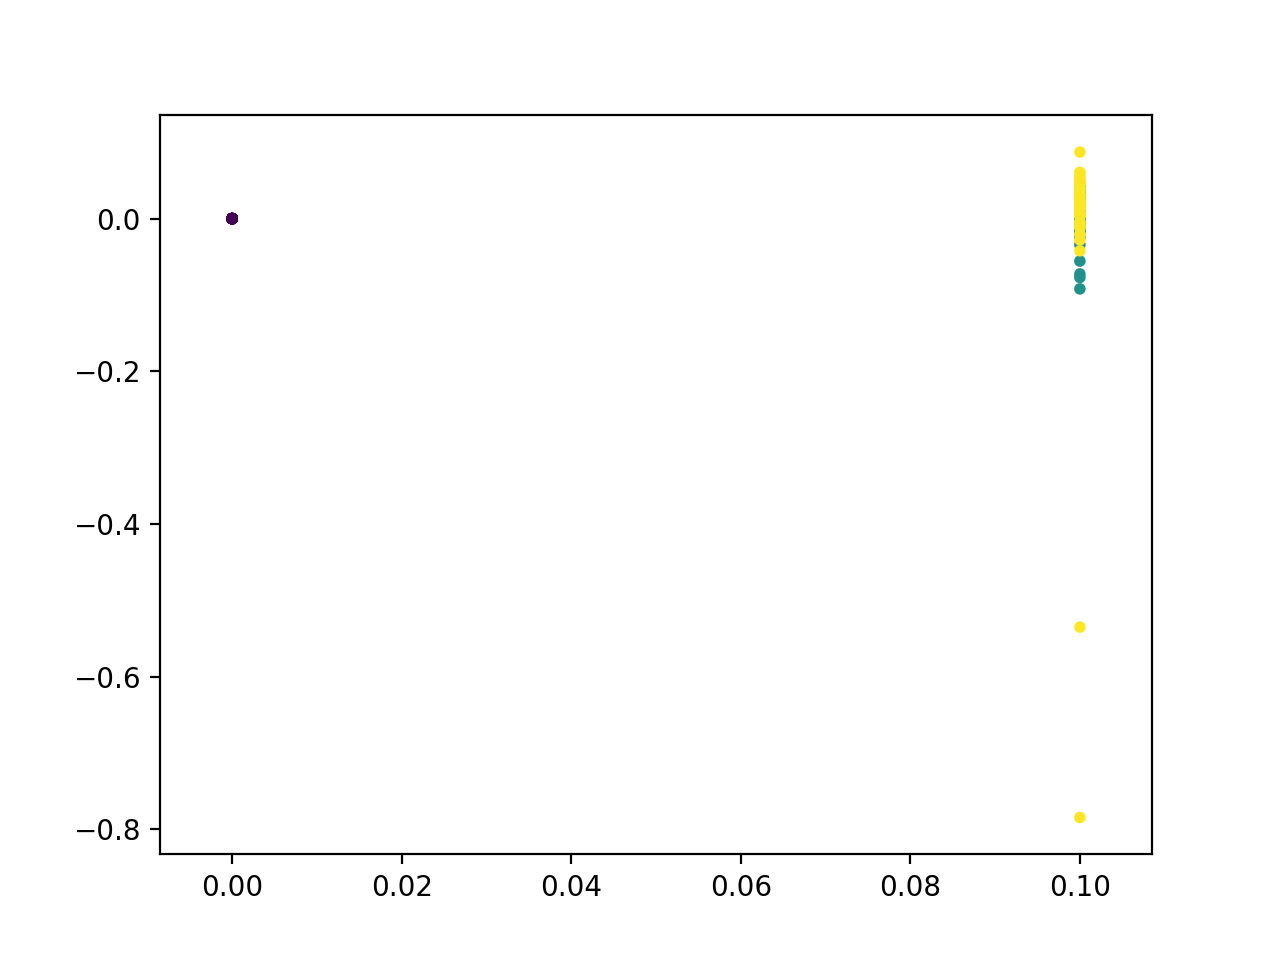

In [123]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
projection = lle.fit_transform(iris["data"])
plt.scatter(*projection.T, c=iris["target"], s=10)